### Pipeline
#### Src: Language-Detection\Dataset\Dataset_agumented1.csv
#### Train-test slipt: 80-20
#### Embedding: tf-idf vectorization
#### Crossvalidation: 5-k fold
#### Model: GaussianNB (Bayesian classifier)

# ==============================

## Importing modules and dataset

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
from imblearn.over_sampling import SMOTE
import pickle

from sklearn.model_selection import train_test_split



target_acc=0.97
target_f1=0.95

## Defining utils methods

In [2]:
# train test split method
def get_train_test_split(data):
    X_train, X_test , y_train, y_test = train_test_split(data['Text'].values,data['Class'].values,test_size=0.2,random_state=123,stratify=data['Class'].values)
    return [X_train,X_test,y_train,y_test]


In [3]:
#Method to trasfrom input via selected embedding
#Input: vector to embed, embedding obj
#Output: input vector transformed
def trasform_embedding(X,embedding):
    tfidf_vectors = embedding.transform(X).toarray()
    return tfidf_vectors



In [4]:
# Method to save the embedding via pickle library
def save_embedding(embedding,name_file):
    

    base_path="..\\..\\models\\"
    extension='.pkl'
    Pkl_Filename = base_path+name_file+extension  

    with open(Pkl_Filename, 'wb') as file:  
        pickle.dump(embedding, file)


In [5]:
#Method to gather stats from the train-test split
#Input: X_train, Y_train
#Output: total observations, italian observations, not_italian_observation
def get_stats_ita_not_ita(X,Y):
    data=[]
    i=0
    for i in range(len(Y)):
        data.append([X[i],Y[i]])

    data_vis=pd.DataFrame(data=data,columns=['Text','Class'])
    italian=len(data_vis[data_vis['Class']==1])
    not_italian=len(data_vis[data_vis['Class']==0])
    total=data_vis.shape[0]
    print('Tot:',total,'Ita:',italian,'Not:',not_italian)
    return (total,italian,not_italian)

In [6]:
#Cross-validation function

from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean(),
              
              }

In [7]:
#Plotting the cross-validation results
import matplotlib.pyplot as plt
import numpy as np
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        
        
        # Set size of plot
        plt.figure(figsize=(8,5))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

In [8]:
#Method to save the model via pickle
import pickle
def save_model(model,fileName):
    base_path="..\\..\\models\\"
    extension='.pkl'
    Pkl_Filename = base_path+fileName+extension  

    with open(Pkl_Filename, 'wb') as file:  
        pickle.dump(model, file)

In [177]:
#Method to load the model
def load_model(name):
    
    base_path='..\\..\\models\\'
    ext='.pkl'
    name=base_path+name+ext
    with open(name, 'rb') as file:  
        model = pickle.load(file)
    return model

In [10]:
# Method used to create a dataframe with text, y_true and y_predicted by the model
def get_data_stats(X,Y,Y_true):
    data=[]
    for i in range(0,len(X)):
        data.append([X[i],Y[i],Y_true[i]])
    
    out=pd.DataFrame(data=data,columns=['Text','f(x)','true'])
    return out

In [11]:
def plot_stats_train_test_split(total,italian_entry,other):
    #Plotting the data computed in the prev. cell
    entyes={'Total':total/total ,'Not_italian':other/total, 'Italian': italian_entry/total}
    Label = list(entyes.keys())
    occ = list(entyes.values())
    fig = plt.figure(figsize = (7, 5))
    
    # creating the bar plot
    plt.bar(Label, occ,
            width = 0.4)
    
    plt.xlabel("Labels")
    plt.ylabel("#Number")
    plt.title("Class to occ.")
    plt.show()

In [12]:
#cleaning data
def claean_data(data):
    data=data.fillna('0')
    data=data[data['Text']!='0']
    return data

In [13]:
def visualize_cross_val_accuracy(model_name,model_stats):
    
    plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            model_stats["Training Accuracy scores"],
            model_stats["Validation Accuracy scores"])

In [14]:
#Visualizing the traing F1 and validation F1
def visualize_cross_val_F1(model_name,model_stats):
    
    plot_result(model_name,
            "F1",
            "F1 scores in 5 fold",
            model_stats["Training F1 scores"],
            model_stats["Validation F1 scores"])

# ===========================================


# Preprocessing pipeline
### Dataset->Embed dataset->Oversampling (Smote)


Before cleaning: 11722
After cleaning: 11717
Training
Tot: 9373 Ita: 1666 Not: 7707


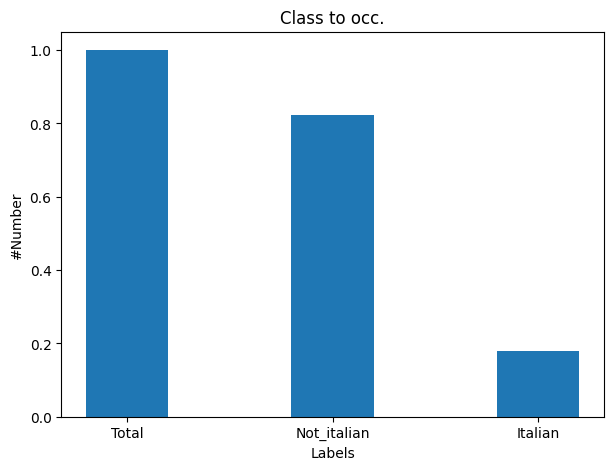

Test
Tot: 2344 Ita: 417 Not: 1927


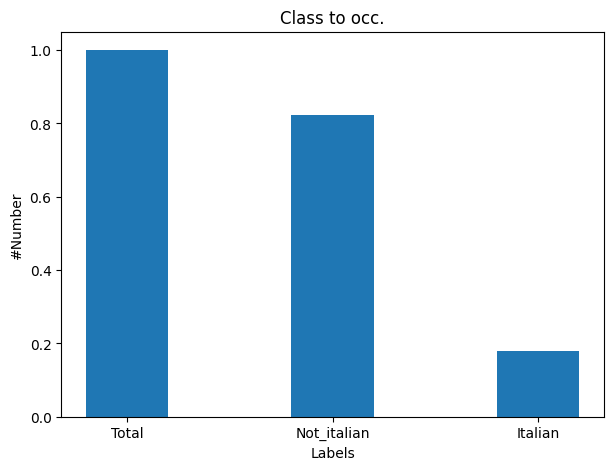

In [15]:
#For the training of the models i will use the agumented dataset, created in notebook Agumentation
data=pd.read_csv('..\\..\\Dataset\\Dataset_agumented1.csv')
print('Before cleaning:',len(data))
data=claean_data(data)
print('After cleaning:',len(data))
data_splits=get_train_test_split(data)
X_train_words=data_splits[0]
X_test_words=data_splits[1]
y_train=data_splits[2]
y_test=data_splits[3]

#Italian and not italian label distribution for trainig data
print('Training')
train_stats=get_stats_ita_not_ita(X_train_words,y_train)
plot_stats_train_test_split(train_stats[0],train_stats[1],train_stats[2])

#Italian and not italian label distribution for test data
print('Test')
get_stats_ita_not_ita(X_test_words,y_test)
plot_stats_train_test_split(train_stats[0],train_stats[1],train_stats[2])

### Embedding data
##### Endocding text data using Tf-If vectorizer (other solution could be word2vec, bert)
##### Tf-idf limitation in this case are handling out-of-vocabolary words and puts more enphasis on the word
##### Word2vec and Bert could be a better solution giving that they enphesis semantic of phrases and not single words

In [160]:
tfidf_vectorizer = TfidfVectorizer() 

X_train = tfidf_vectorizer.fit_transform(X_train_words).toarray()
save_embedding(tfidf_vectorizer,'tf_idf_after_agumentation_en_sp_fr')

In [161]:
#trasform test set

X_test=trasform_embedding(X_test_words,tfidf_vectorizer)

### Handling umbalanced data using SMOTE
##### NOTE: SMOTE is not ideal for text oversampling but for time reasons i decided to use this rather then other cosutume solutions.


In [150]:
smote = SMOTE(random_state=42,k_neighbors=8)
X, Y= smote.fit_resample(X_train, y_train)
print('Before SMOTE')
training_stats=get_stats_ita_not_ita(X_train,y_train)
test_stats=get_stats_ita_not_ita(X_test,y_test)

print('After SMOTE (training)')
training_stats_SMOTE=get_stats_ita_not_ita(X,Y)

Before SMOTE
Tot: 9373 Ita: 1666 Not: 7707
Tot: 2344 Ita: 417 Not: 1927
After SMOTE (training)
Tot: 15414 Ita: 7707 Not: 7707


### MODEL SELECTION
### 1. GaussianNB


In [162]:
#Training model 2 - Bayesian model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()



In [152]:
#model_gauss_stas = cross_validation(model, X_train, y_train, 5)

In [153]:
#Visualizing Corss-validation accuracy
#visualize_cross_val_accuracy('Gaussian model',model_gauss_stas)


In [154]:
#Visualizing F1 cross-val score
#visualize_cross_val_F1('Gaussian model',model_gauss_stas)


In [163]:
#fitting the model 
#model.fit(X,Y)      #training with smote
model.fit(X_train,y_train)  #whitout smote
save_model(model,'Gaussian_model')

In [164]:
#predicting the model
model=load_model('..\\..\\models\\Gaussian_model.pkl')
y_pred=model.predict(X_test)

In [165]:
#creating a dataset of the predictions related to the test set
data_set_gaussian=get_data_stats(X_test_words,y_pred,y_test)

In [166]:
#checking errors and correct predictions
ERRORS=data_set_gaussian[data_set_gaussian['f(x)']!=data_set_gaussian['true']]
Not_ERRORS=data_set_gaussian[data_set_gaussian['f(x)']==data_set_gaussian['true']]


ERRORS.to_csv('..\\Error_analysis\\Docs\\Gaussian_errors.csv')
print(len(ERRORS))
Not_ERRORS.to_csv('..\\Error_analysis\\Docs\\Gaussian_correct.csv')


36


In [168]:
#SCORES

from sklearn.metrics import f1_score,accuracy_score
from sklearn.metrics import matthews_corrcoef
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
matt=matthews_corrcoef(y_test,y_pred)
print('ACCURACY->Target:',target_acc,'Actual',acc)

print('ACCURACY->Target:',target_f1,'Actual',f1)
print('Matt:',matt)

ACCURACY->Target: 0.97 Actual 0.984641638225256
ACCURACY->Target: 0.95 Actual 0.9583333333333334
Matt: 0.9497934447472787


In [179]:
#training the model- Decision tree (hyperparam selecter: randomstae=0, criterion='Entropy')
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(criterion="entropy",
                                     random_state=0)


In [180]:
decision_tree_model.fit(X_train,y_train)
save_model(decision_tree_model,'decision_tree_model')

In [ ]:

decision_tree_model=load_model('decision_tree_model')
y_pred=decision_tree_model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
matt=matthews_corrcoef(y_test,y_pred)
print('ACCURACY->Target:',target_acc,'Actual',acc)

print('ACCURACY->Target:',target_f1,'Actual',f1)
print('Matt:',matt)


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
save_model(clf,'logistig_reg')

In [ ]:
clf=load_model('decision_tree_model')
y_pred=clf.predict(X_test)
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
matt=matthews_corrcoef(y_test,y_pred)
print('ACCURACY->Target:',target_acc,'Actual',acc)

print('ACCURACY->Target:',target_f1,'Actual',f1)
print('Matt:',matt)

### NOTE 1 (Embedding selection)
#### Even if tf-idf vectorization has provided good performances both in accuracy and time complexity, it is not quite fitted for the task.
#### As we can see from the errors generated from the model, many phrases are incorreclty classified for two main reasons:
#### 1. Vocabulary Size and Out-of-Vocabulary (OOV) Words: The size of the vocabulary used in TF-IDF vectorization can impact the performance of the model. 
#### Large vocabularies can lead to increased computational complexity, memory usage, and slower training and inference times. Additionally, TF-IDF may not be effective in handling out-of-vocabulary (OOV) words, i.e., words that are not present in the vocabulary, which can result in loss of information for rare or domain-specific terms.
#### 2.Lack of Semantic Meaning: tf-idf does not take in consideration the semantic meaning of phrases. This means for example given an italain phrase A similar to italian phrase B (which words are all embedded in the tf-idf matrix) even if A is semantically similar to B, the model does not know how to classify it. Another example of this strange behavior is for english words that are commonly used in the italian vocabolary (es. Big data).  If the tf-idf are computed without the words Big and Data in italain phrases, the input 'I big data sono il futuro' will be predicted as Not italian duo the present of the words 'Big' and 'Data'

#### Improvments
#### For this reasonos (and many others) to improve the model performace i should try to use a different embedding strategy such as pretrained word2vec, bert, doc2vec which are currently state-of-the art in NLP
# ==========================================================0

### NOTE 2 (Oversampling SMOTE)
#### SMOTE (Synthetic Minority Over-sampling Technique) is a popular technique for oversampling imbalanced datasets in machine learning, but it may not always be suitable for oversampling text data.
#### SMOTE works by generating synthetic examples of minority class instances by interpolating between existing instances of the minority class.
#### For this reason, when working with real data (real text having a specific structure, sematic and words) a simple interpolation could lead to the creation of none-sense text that have 0 informative contribution.

#### In this case using SMOTE has provided a small increase of the accuracy and F1 score of the model. More precisely the accuracy increased from 0.965 (no SMOOTE) to 0.98 (SMOOTE) (+0.2), f1 has increased from 0.93(no SMOTE) to 0.955 (SMOTE) (+0.2), MCC has also increased of 0.2.

### IMPROVMENTS
#### A more effective way to handle unbalanced data when working with text in my opionio is to exploit word2vec or bert embeddings.
#### Because these methods also store information regarding the semantic of words, new phrases to insert in the dataset could be created by 
#### swapping words with others semantically similar.

#### Other ways to reduce the effect of unbalanced datasets is to gather new data (scraping or extending the agumentation logic implemented in Agumentation.ipynb) 
# =================================================================



### NOTE 3 (EVALUTION METRICS)
#### Because the dataset provided is pretty unbalanced (even after Agumentation) and the SMOTE oversampling is not effective in this scenario, the evaluation of the model should consider this aspect. 
#### For this reason the model has been evaluated using these metrics:
#### -Accuracy (which does not provide a good evaluation in unbalanced scenarios)
#### -f1 (score is often considered a good evaluation metric for models trained on unbalanced data because it takes into account both precision and recall, which are important measures in such scenarios)
#### -MCC (Matthews Correlation Coefficient)



### NOTE 4 (MODEL SELECTION)
#### GaussianNB is known to be a good performing model in text classification. It is widly use in sentiment analysis, spam detection etc...
#### In this case, given the simplicity of the task and the fact that the phrases of the dataset were not that big, using a neural network would be like 'shooting and ant with a cannon' as my professor would say
#### GaussinaNB shows also better performace then Decisiontree and LogistcRegression